# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
record_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
np.random.seed(650)
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count 
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# set lists for the dataframe
citylist = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities 
record_one = 0
set_one = 1
print('''
Beginning Data Retrieval     
-----------------------------''')
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if record_one > 50:
            record_one = 1
            set_one += 1
            citylist.append(city)
        else:
            record_one += 1
            citylist.append(city)
        print(f"Processing Record {record_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | tres arroyos
Processing Record 3 of Set 1 | savannah bight
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | gorontalo
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | newcastle
Processing Record 13 of Set 1 | ulaanbaatar
Processing Record 14 of Set 1 | lakhipur
City not found. Skipping...
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | taksimo
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | rikitea
Processi

Processing Record 35 of Set 4 | wanning
Processing Record 36 of Set 4 | lorengau
Processing Record 37 of Set 4 | honiara
Processing Record 38 of Set 4 | husavik
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | egvekinot
Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | sistranda
Processing Record 43 of Set 4 | kieta
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | suba
Processing Record 47 of Set 4 | valparaiso
Processing Record 48 of Set 4 | port moresby
Processing Record 49 of Set 4 | yarim
Processing Record 50 of Set 4 | ambon
Processing Record 51 of Set 4 | unity
Processing Record 1 of Set 5 | suda
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | san quintin
Processing Record 4 of Set 5 | maneadero
Processing Record 5 of Set 5 | turbiv
Processing Record 6 of Set 5 | sorland
Processing Record 7 of Set 5 | luderitz
Processing Record 8 of Set 5 | roc

Processing Record 16 of Set 8 | nanortalik
Processing Record 17 of Set 8 | sao joao da barra
Processing Record 18 of Set 8 | klyuchevskiy
Processing Record 19 of Set 8 | fujin
Processing Record 20 of Set 8 | taltal
Processing Record 21 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 8 | vrangel
Processing Record 23 of Set 8 | comodoro rivadavia
Processing Record 24 of Set 8 | lubaczow
Processing Record 25 of Set 8 | emerald
Processing Record 26 of Set 8 | lago da pedra
City not found. Skipping...
Processing Record 27 of Set 8 | ravar
Processing Record 28 of Set 8 | kingston
Processing Record 29 of Set 8 | neuquen
Processing Record 30 of Set 8 | leh
Processing Record 31 of Set 8 | mwinilunga
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | belyy yar
Processing Record 34 of Set 8 | shahrud
Processing Record 35 of Set 8 | lakselv
Processing Record 36 of Set 8 | apele vii
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | carave

Processing Record 48 of Set 11 | katsuura
Processing Record 49 of Set 11 | inza
Processing Record 50 of Set 11 | pathein
Processing Record 51 of Set 11 | asfi
Processing Record 1 of Set 12 | chlorakas
Processing Record 2 of Set 12 | salinopolis
Processing Record 3 of Set 12 | zandvoort
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame to store data processed.
City_weather_df = pd.DataFrame({"City":citylist, "Lat":lats, "Lng":lngs, "Max Temp":max_temps, "Humidity":humidities , "Cloudiness":cloudinesses, "Wind Speed":wind_speeds, "Country":countries, "Date":dates})
City_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.00,79,90,9.22,CA,1615090831
1,tres arroyos,46.3231,11.0969,33.01,100,90,4.61,IT,1615090831
2,savannah bight,32.0835,-81.0998,44.60,65,1,4.47,US,1615090825
3,hamilton,39.1834,-84.5333,34.00,80,1,1.16,US,1615090832
4,hilo,19.7297,-155.0900,73.40,73,75,6.91,US,1615090832


In [5]:
#DataFrame.to_csv(path)
City_weather_df.to_csv(output_data_file)

In [6]:
# summary stat for the table
City_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,22.950992,21.943959,51.652553,72.875887,50.209220,8.031755,1.615091e+09
std,31.886665,85.646294,28.132265,20.839968,40.345121,5.927129,6.645508e+01
min,-54.800000,-179.166700,-27.780000,12.000000,0.000000,0.360000,1.615091e+09
25%,-3.571900,-49.979875,33.800000,63.750000,2.000000,3.485000,1.615091e+09
50%,28.820700,24.640700,56.170000,78.500000,49.000000,6.805000,1.615091e+09
75%,50.211200,90.744750,75.995000,88.000000,90.000000,11.500000,1.615091e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,34.520000,1.615091e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# proof
#max humidity = 100 per City_weather_df
City_weather_df.loc[City_weather_df["Humidity"]>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


#  Get the indices of cities that have humidity over 100%.
None of the randomly selected cities have humidity over 100%.

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [85]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
City_weather_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.00,79,90,9.22,CA,1615090831
1,tres arroyos,46.3231,11.0969,33.01,100,90,4.61,IT,1615090831
2,savannah bight,32.0835,-81.0998,44.60,65,1,4.47,US,1615090825
3,hamilton,39.1834,-84.5333,34.00,80,1,1.16,US,1615090832
4,hilo,19.7297,-155.0900,73.40,73,75,6.91,US,1615090832


## Latitude vs. Temperature Plot

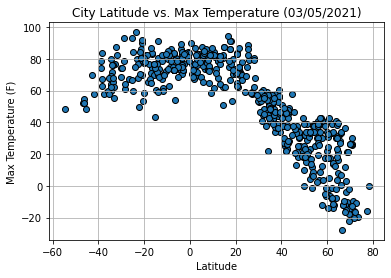

In [13]:
# Create Scatter Plot 
x_axis = City_weather_df["Lat"]
y_axis = City_weather_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (03/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/fig1.png")
plt.grid()

## Latitude vs. Humidity Plot

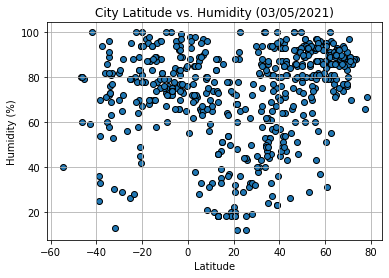

In [14]:
# Create Scatter Plot 
x_axis = City_weather_df["Lat"]
y_axis = City_weather_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity (03/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/fig2.png")
plt.grid()

## Latitude vs. Cloudiness Plot

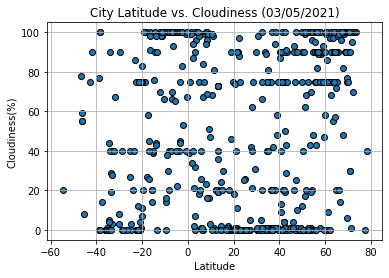

In [15]:
# Create Scatter Plot 
x_axis = City_weather_df["Lat"]
y_axis = City_weather_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (03/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("../output_data/fig3.png")
plt.grid()

## Latitude vs. Wind Speed Plot

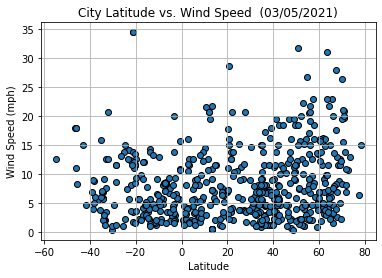

In [16]:
# Create Scatter Plot 
x_axis = City_weather_df["Lat"]
y_axis = City_weather_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed  (03/05/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/fig4.png")
plt.grid()

## Linear Regression

In [35]:
# Create dataframe for northern hemisphere data
northern_df = City_weather_df.loc[City_weather_df["Lat"]>= 0]
northern_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.00,79,90,9.22,CA,1615090831
1,tres arroyos,46.3231,11.0969,33.01,100,90,4.61,IT,1615090831
2,savannah bight,32.0835,-81.0998,44.60,65,1,4.47,US,1615090825
3,hamilton,39.1834,-84.5333,34.00,80,1,1.16,US,1615090832
4,hilo,19.7297,-155.0900,73.40,73,75,6.91,US,1615090832
...,...,...,...,...,...,...,...,...,...
558,inza,53.8533,46.3586,5.95,94,70,4.63,RU,1615090917
559,pathein,16.7833,94.7333,94.68,18,0,7.92,MM,1615090918
560,asfi,32.2994,-9.2372,55.65,85,1,3.11,MA,1615090758
561,chlorakas,34.8042,32.4083,48.20,87,40,8.05,CY,1615090918


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7854294199183162


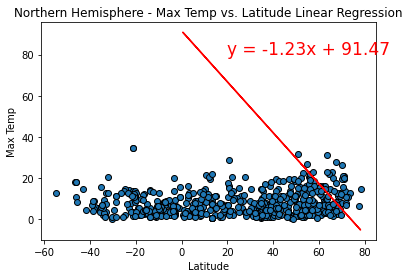

In [42]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,80),fontsize=17,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("../output_data/fig5.png")
print(f"The r-value is: {rvalue**2}")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
# Create dataframe for northern hemisphere data
southern_df = City_weather_df.loc[City_weather_df["Lat"] < 0]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,cape town,-36.4130,-71.9028,59.00,82,0,5.50,CL,1615090832
8,ushuaia,-54.8000,-68.3000,48.20,40,20,12.66,AR,1615090833
11,newcastle,-32.9272,151.7765,77.00,53,40,12.66,AU,1615090833
16,port alfred,-7.0349,29.7638,73.06,74,100,8.41,CD,1615090834
18,busselton,-33.6500,115.3333,75.99,69,19,1.99,AU,1615090834
...,...,...,...,...,...,...,...,...,...
522,caluquembe,-13.7833,14.6833,59.18,74,98,1.12,AO,1615090912
530,kirakira,-10.4544,161.9205,83.26,76,100,6.44,SB,1615090678
535,satipo,-11.2522,-74.6386,69.87,82,100,2.01,PE,1615090914
553,mahajanga,-15.7167,46.3167,77.00,94,20,4.61,MG,1615090917


The r-value is: 0.1973985999163747


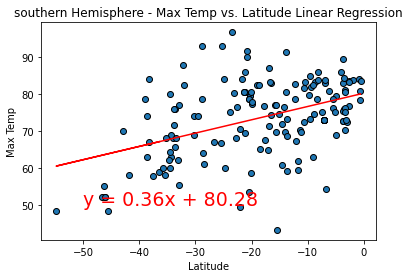

In [46]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=19,color="red")
plt.title("southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16172887827901558


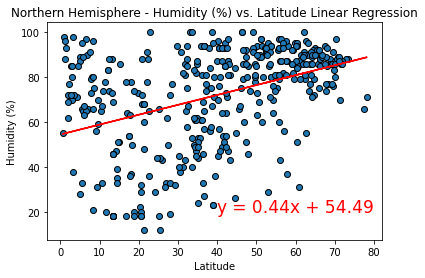

In [47]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=17,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig7.png")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09027068080833872


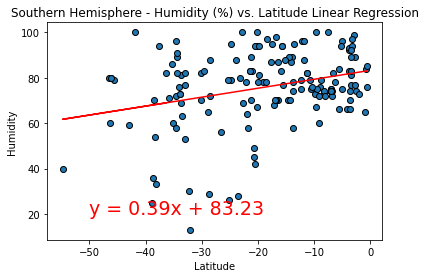

In [48]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=19,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07305570033842806


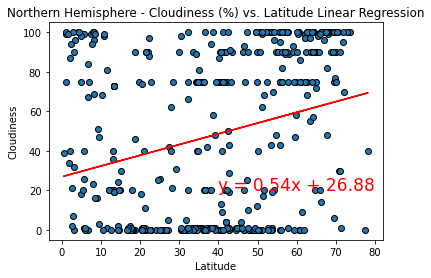

In [49]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=17,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23596752613784494


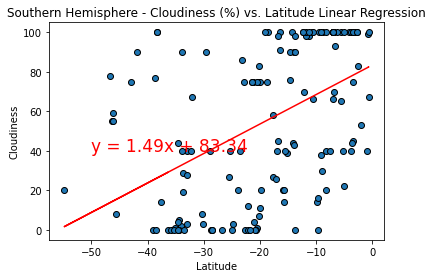

In [51]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=17,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05012370975182935


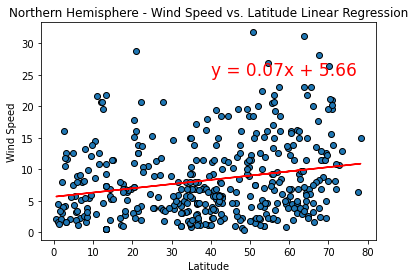

In [52]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=17,color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.037265954222365075


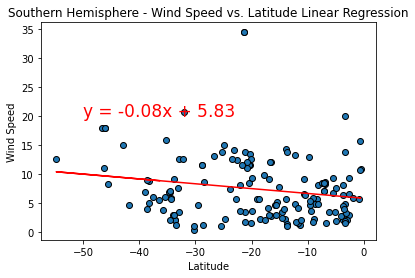

In [53]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=17,color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/fig12.png")
plt.show()

In [54]:
print(f"Out of 629 cities analyzed Northern Hemisphere has significant correlation in Max Temp and Latitude with r-value of 0.74 and Southern Hemisphere has no significant correlation in Max Temp and Latitude with r-value of 0.22. No correlation found in Humidity (%) and Latitude in either Hemispheres. No correlation found in Cloudiness (%) and Latitude in either Hemispheres. No correlation found in Wind Speed (mph) and Latitude in either Hemispheres.")

Out of 629 cities analyzed Northern Hemisphere has significant correlation in Max Temp and Latitude with r-value of 0.74 and Southern Hemisphere has no significant correlation in Max Temp and Latitude with r-value of 0.22. No correlation found in Humidity (%) and Latitude in either Hemispheres. No correlation found in Cloudiness (%) and Latitude in either Hemispheres. No correlation found in Wind Speed (mph) and Latitude in either Hemispheres.


In [ ]:
# The End! :)